# Seabornは統計データ解析に特化したラッパーパッケージ

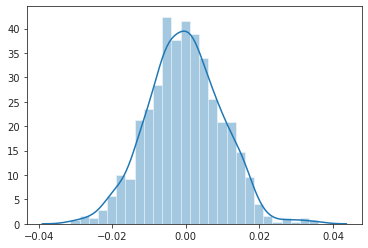

In [2]:
import seaborn as sns
import numpy as np


x =np.random.normal(size = 1000)*0.01
sns.set_style('ticks') #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.distplot(x,
             kde = True, #カーネル密度推定 Kernel density estimate　表示
             rug = False #データの位置を下部に棒状に（敷物rug）を配置することができる
            )

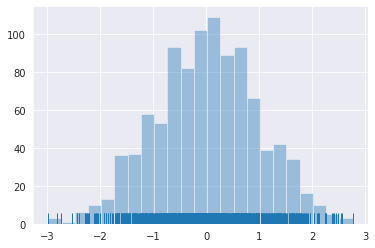

In [3]:
x =np.random.normal(size = 1000)
sns.set_style('darkgrid') #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.distplot(x,
             kde = False,
             rug = True #データ
            )

## Dataset 1: tipsデータ

チップの支払額を推定するためのデータセット

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## jointplot

* jointplotは散布図を描画するためのseaborn関数



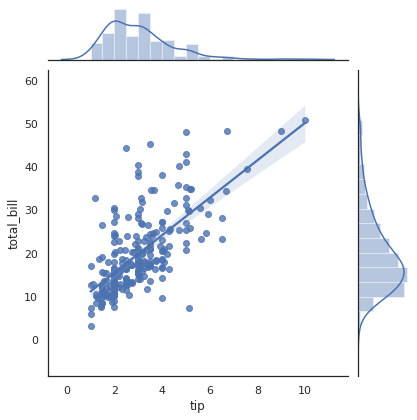

In [15]:
# 背景を白に設定
sns.set(style="white", color_codes=True)

sns.jointplot(x = 'tip', 
              y = 'total_bill',
              data = tips,
              kind = 'reg',
             )

全メソード確認しました
https://own-search-and-study.xyz/2017/05/02/seaborn%E3%81%AE%E5%85%A8%E3%83%A1%E3%82%BD%E3%83%83%E3%83%89%E3%82%92%E8%A7%A3%E8%AA%AC%EF%BC%88%E3%81%9D%E3%81%AE%EF%BC%91%EF%BC%9A%E3%82%B0%E3%83%A9%E3%83%95%E4%B8%80%E8%A6%A7%EF%BC%89/

引数紹介
https://pythondatascience.plavox.info/seaborn/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0%E3%81%A4%E3%81%8D%E3%81%AE%E6%95%A3%E5%B8%83%E5%9B%B3

seaborn.jointplot(x, y,data=None, kind='scatter', stat_func=<function pearsonr>,
                  color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None,
                  ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None,
                  **kwargs)


* x, y 	データをベクトルで指定、または、データセットの列名を文字列で指定。
* ***data*** 	描画に用いるデータフレーム。出力対象の列名は上記 x と y で指定します。
* ***kind*** 	プロットの種類。以下から指定する。
    * "scatter" : 散布図
    * "reg": 散布図と回帰直線
    * "resid": y 軸に回帰直線からの残差 (誤差) を出力する
    * "kde": カーネル密度推定を用いた等高線風の図
    * "hex": 六角形のヒートマップ
* stat_func 	散布図の右上に表示する統計量を計算する関数。入力パラメータは、(x, y) の 2 値であり、出力は (統計量, p 値) で構成される必要があります。
* color 	各要素をプロットする際に用いる matplotlib の色名を指定。
* size 	図のサイズを数値で指定。
* ratio : numeric, optional 	Ratio of joint axes size to marginal axes height.
* space 	散布図と散布図の外側に出力するヒストグラムの間の空きスペースの大きさを数値で指定する。
* dropna 	True に設定すると、欠損値を乗り除きます。
* xlim, ylim 	x軸、y軸の下限、上限をタプル (下限, 条件) で指定。
* joint_kws, marginal_kws, annot_kws 	プロットに用いる各種オプションをディクショナリで指定。

## FacetGrid−複数のグラフを項目別に格子状に並べる

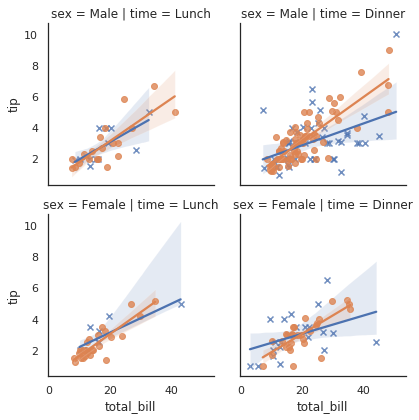

In [21]:
g = sns.FacetGrid(row= 'sex', #横の２つのグラフをランチかディナーに分ける
                 col = 'time',#縦の２つのグラフを男性か女性に分ける
                 hue = 'smoker',#喫煙者を色調(hue)に分類(青以外)
                 hue_kws = {'marker': ['x', 'o']},#喫煙者を丸印でも表示させている。
                 data = tips) 
g.map(sns.regplot, 'total_bill', 'tip')#4コマのMAPメソッドでチップと総額の相関をregplotも使用し、描画している

## Violin plot - バイオリン図（箱ひげ図の高級バージョン）

* バイオリン図はカーネル密度関数をバイオリンに見立てて描画している
* seabornの関数では、sns.violinplotである。
* hueとsplitの設定で左右別の表示をできる

成果：曜日別の分布を見ると、土曜、男性テーブルでのチップが多いことがわかる。

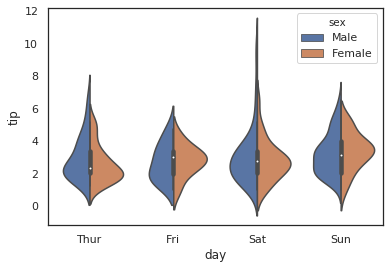

In [26]:
sns.violinplot(x = 'day',
              y = 'tip',
              hue = 'sex',
              split = True,
              data = tips
              )

## Dataset 2: titanicデータ

In [27]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## factorplot

* **factorplotはFacetGridクラスを使用してカテゴリデータを描画するための関数である。
* 引数kind を変えることで、箱ひげ図boxやバイオリン図violinを含む様々の図を描画できる

成果：下記の図から、客室レベル高い方、女性の方が圧倒的に生存率が高いことがわかる


/home/kun/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


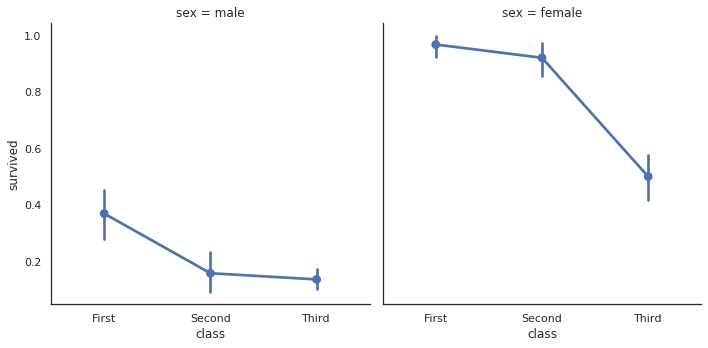

In [28]:
sns.factorplot(x = 'class',
              y = 'survived',
              col = 'sex',
              data = titanic
              )

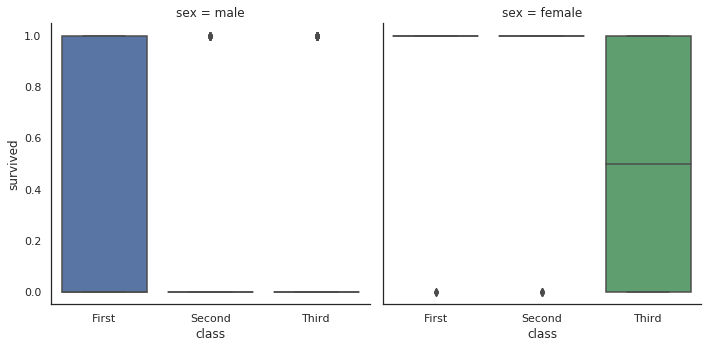

In [38]:
"""
UserWarning: 
The `factorplot` function has been renamed to `catplot`. 
The original name will be removed in a future release. 
Please update your code

sns.factorplot(x = 'sex',
              y = 'survived',
              col = 'class',
              data = titanic,
               kind = 'violin',
               split = True,
               hue = 'sex'
              )           
"""
sns.catplot(x = 'class',
            y = 'survived',
            col = 'sex',
              data = titanic,
               kind = 'box',
              )

## lmplot - 線形モデルプロット関数
* **FacetGridクラスを用いて格子に回帰分析を表示する
* **ロジスティック回帰を適用するためには、引数のlogisticをTrueにする

下記の例では、男女別の運賃と生存確率の関係を調べる
ポイントは、生存かどうかは０・１のため、回帰分析ではなく、ロジスティック回帰を使うところだ
成果として、運賃の高いほうが生存率が高いことがわかる

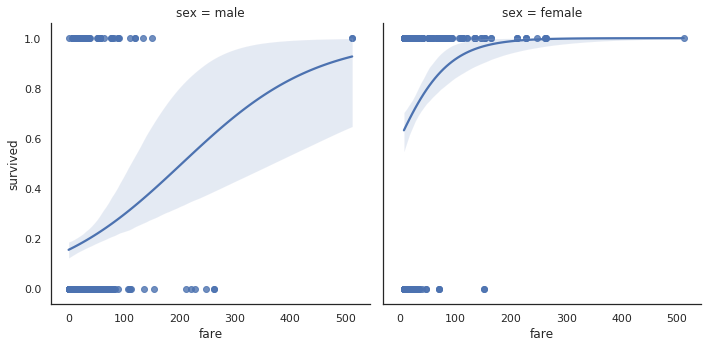

In [41]:
sns.lmplot(x='fare',
          y='survived',
          col='sex',
          data=titanic,
          logistic=True
          )

## Dataset 3 irisデータ

iris - アヤメ菖蒲

* sepal_length　萼片長
* sepal_width　萼片幅
* petal_length　花弁長
* petal_width　花弁幅
* species　菖蒲種類：檜扇ひおうぎsetosa；バーシクルversicolor；バージニカvirginica

In [43]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## pairplot 

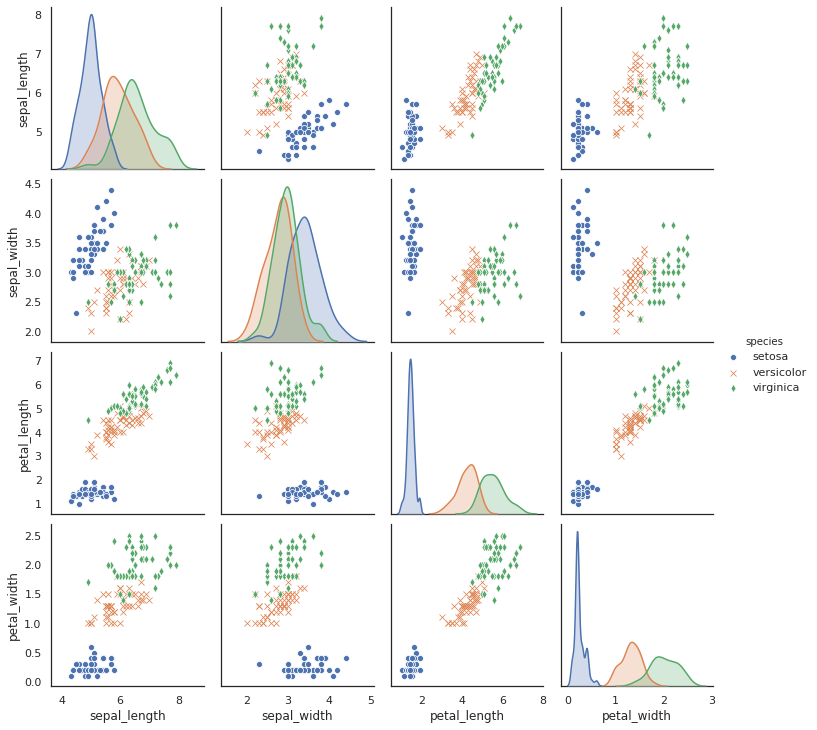

In [44]:
sns.pairplot(iris,
            hue = 'species',
            markers = ['o', 'x', 'd'])

#### 最後に
http://stanford.edu/~mwaskom/software/seaborn/
    を参照してください

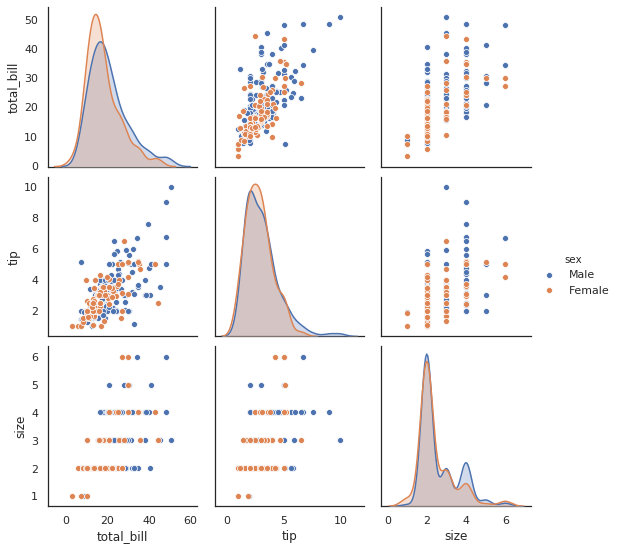

In [45]:
sns.pairplot(tips,
            hue = 'sex'
            )